Stroke Prediction Model - DSTI Project 
Machine Learning with Python Labs - Mr. Hanna Abi Akl

By Paula Tomazoni Gacia, A21 - SPOC
March, 2023

In [1]:
# We start the process by importing the libraries and the data provided for this assignment:

import pandas as pd
import numpy as np

stroke_data = pd.read_csv('stroke_data.csv')

In [10]:
# Have a first look at the data
stroke_data.head()
stroke_data.info()
print(stroke_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.

In [3]:
#Data Cleaning

#Start by looking for missing values:

stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#Out of 5110 patients, 201 have the BMI number missing, so we will substitute them for the mean:

stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].mean())

In [32]:
# Drop the id column as it is not relevant here:

stroke_data = stroke_data.drop('id', axis=1)

In [14]:
#Now we change the categorical data into numerical with Label Encoder. That is an important step to make sure the Machine Learning Model can read our data:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
stroke_data['gender'] = le.fit_transform(stroke_data['gender'])
stroke_data['ever_married'] = le.fit_transform(stroke_data['ever_married'])
stroke_data['work_type'] = le.fit_transform(stroke_data['work_type'])
stroke_data['Residence_type'] = le.fit_transform(stroke_data['Residence_type'])
stroke_data['smoking_status'] = le.fit_transform(stroke_data['smoking_status'])

In [15]:
#Now we check a few items to explore the data and see possible correlations:

stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
stroke_data[['age', 'stroke']].corr()

,age,stroke
age,1.000000,0.245257
stroke,0.245257,1.000000


In [9]:
stroke_data[stroke_data['stroke'] == 1]['smoking_status'].value_counts()

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

In [19]:
#Let's import more libraries to plot the data for better visualization:

import matplotlib.pyplot as plt
import seaborn as sns

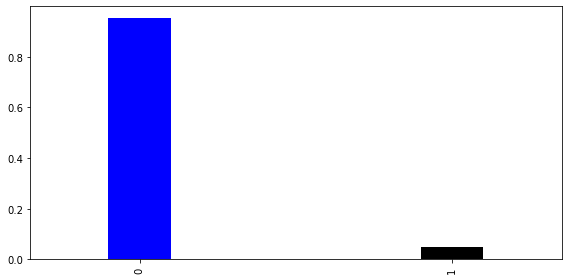

In [48]:
#Preparing to visualize the data:

fig, axes = plt.subplots(figsize=(8, 4))
stroke_data['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('blue','black'))

plt.tight_layout()
plt.show()

In [45]:
# Now we check how the data is distributed in these columns:

cols = stroke_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


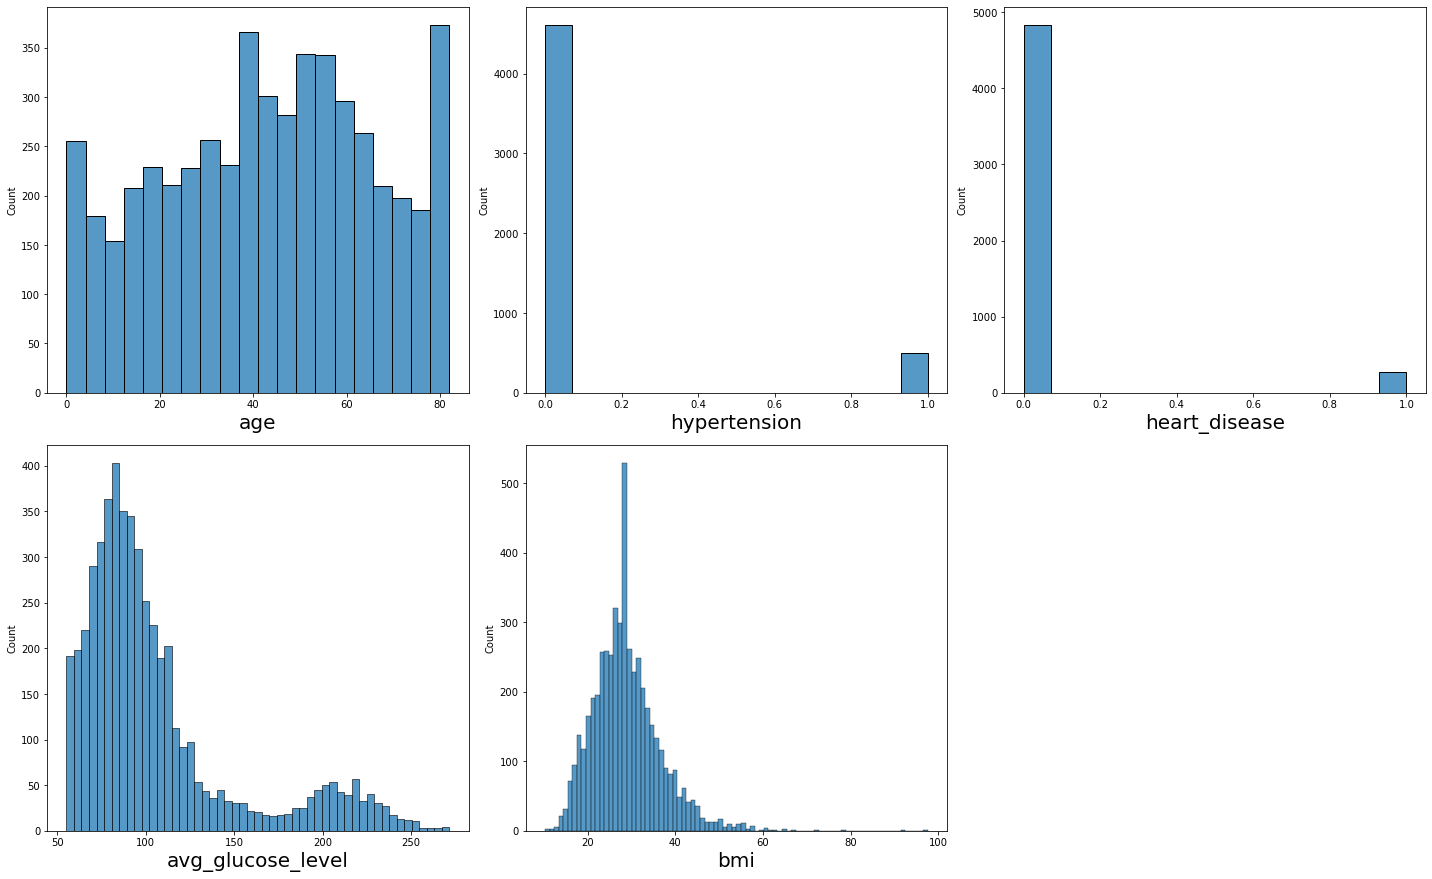

In [51]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

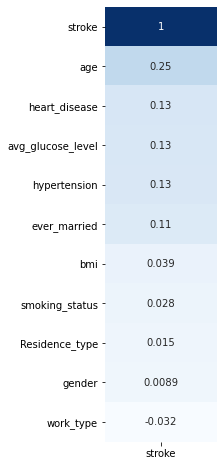

In [57]:
#Let's check the correlation between the features and the target:

corr = stroke_data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

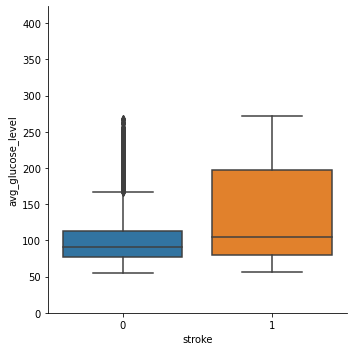

In [59]:
#As a diabetic person, I decided to go a bit further with the Glucose Level to satisfy my own curiosity:

stroke_data['avg_glucose_level'].nunique()
sns.displot(stroke_data['avg_glucose_level'])
sns.boxplot(data=stroke_data,x='stroke',y='avg_glucose_level')

So far the analysis has shown that features like Gender, Glucose level, Heart Diseases, and Body Mass Index all play a role in a person's risk of having a stroke, but Age is the most prominent factor. A Glicemic level above 100, which is one of the factors for people to be diagnosed with Diabetes, also play a considerable role in increasing the chances of having a stroke. Next, we move on to select features and train models.

In [34]:
#Now let's split the data into training and testing groups. We will use the traditional 80/20 ratio with the 'train_test_split' function:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stroke_data.drop('stroke', axis=1), stroke_data['stroke'], test_size=0.2, random_state=42)


In [35]:
#Next, we scale the data:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
#And train the model to check its performance:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [63]:
#Make some predictions here:

from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)


In [64]:
#And voila':

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\ptoma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ptoma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ptoma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#Finally, an extra effort to check on the accuracy of the model:

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9393346379647749


Conclusion

This project aims at building a machine learning model for predicting the risk of stroke. The desing and strategy was based on the lessons by Mr. Hanna Abi Akl and on similar studies and tutorials published on the internet.    
